In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")
print("Path to dataset files:", path)

100%|██████████| 1.98G/1.98G [01:18<00:00, 27.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
dataset_directory = '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8'

In [5]:
# Create ImageDataGenerator for data augmentation and loading the images
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
train_generator = train_datagen.flow_from_directory(
    dataset_directory + '/train',  # Path to training images
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='binary'  # Change to 'categorical' if more than 2 classes
)

Found 3115 images belonging to 36 classes.


In [8]:
validation_generator = test_datagen.flow_from_directory(
    dataset_directory + '/validation',  # Path to validation images
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Change to 'categorical' if more than 2 classes
)


Found 351 images belonging to 36 classes.


In [9]:
# Step 2: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Change to 'softmax' for multi-class classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 3: Compile the Model
model.compile(
    loss='binary_crossentropy',  # Use 'categorical_crossentropy' for more than 2 classes
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
# Step 4: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.0272 - loss: -3571176186052608.0000 - val_accuracy: 0.0250 - val_loss: -6412635281031168.0000
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0000e+00 - loss: -6627957023965184.0000 - val_accuracy: 0.0323 - val_loss: -6583610949763072.0000
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.0237 - loss: -7612045163757568.0000 - val_accuracy: 0.0250 - val_loss: -12339464663728128.0000
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0312 - loss: -13805025616723968.0000 - val_accuracy: 0.0323 - val_loss: -16405873127587840.0000
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.0220 - loss: -14517293329416192.0000 - val_accuracy: 0.0250 - val_loss: -22292284720545792.0000
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0312 - loss: -21634385925111808.0000 - val_accuracy: 0.0323 - val_loss: -29310658566684672.0000
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━

In [14]:

loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.0269 - loss: -342799550555095040.0000
Validation Loss: -3.496921827911926e+17
Validation Accuracy: 0.025641025975346565


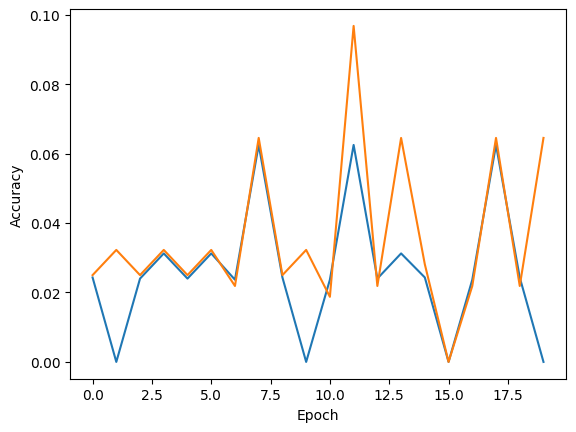

In [16]:
# Step 6: Visualize Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# Save the model
model.save('fruit_vegetable_classifier.h5')

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [20]:
model = tf.keras.models.load_model('fruit_vegetable_classifier.h5')


In [33]:
img_path = 'img.jpg'


In [34]:
# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model input
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image to [0, 1] range

In [35]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [36]:
# Step 4: Interpret the result
# For binary classification (fruits vs vegetables), use sigmoid output
# If you have more than two classes, use softmax and check for the class with the highest probability
if prediction[0] > 0.5:
    label = 'Vegetable'
else:
    label = 'Fruit'


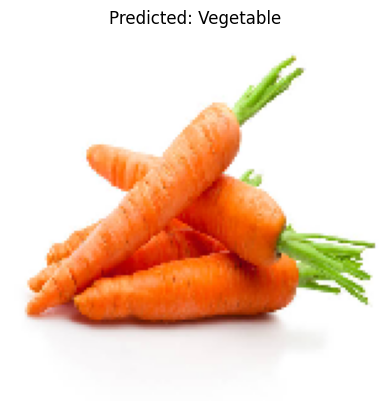

In [37]:
# Step 5: Display the image and prediction result
plt.imshow(img)
plt.title(f'Predicted: {label}')
plt.axis('off')  # Hide axis
plt.show()